### Preparing the Dataset (Tweets extraction)

In [2]:
import re
import twint
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification, AutoTokenizer


# Solve compatibility issues with notebooks and RunTime errors
import nest_asyncio
nest_asyncio.apply()

In [3]:
# Twint configurations to extract Tweets 
c = twint.Config()
c.Search = "vaccine"
c.Store_csv = True
c.Output = "./vaccine_02.csv"
c.Hide_output = True
c.Limit = 50000 
twint.run.Search(c)

In [4]:
# Loading the Tweets Dataset into a Dataframe
tweets_dataset = pd.read_csv("./vaccine_02.csv")

In [5]:
# Checking features/columns
tweets_dataset.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [6]:
tweets = tweets_dataset[["tweet"]]
tweets

,tweet
0,@f_philippot il a surtout atteint le niveau de...
1,"""We have not seen any significant—any data to ..."
2,@WDRBNews Drop mask and vaccine requirements a...
3,"@deepwebghost Also, to be totally fair, they d..."
4,@Ugobernalicis Combien vacciné 🤔
...,...
55020,Nicola Sturgeon's mask and vaccine passport po...
55021,Robert Kennedy Jr. is one Kennedy where the ap...
55022,@VileAgatha @goeing_j @tonygoldmark @BronyDeba...
55023,@winstonpeters Yes Winnie. Finally!! The manda...


In [7]:
# Function to clean the Tweets
def clean_tweets(tweets):
    tweets = re.sub("#vaccine", "vaccine", tweets)
    tweets = re.sub("#Vaccine", "Vaccine", tweets)
    tweets = re.sub("#[A-Za-z0-9]+", "", tweets)
    tweets = re.sub("\\n", "", tweets)
    tweets = re.sub("https?:\/\/\S+", "", tweets)
    tweets = re.sub("@[A-Za-z0-9]+", "", tweets)
    return tweets

In [8]:
# Cleaning the Tweets and adding to a DataFrame
tweets_clean = pd.DataFrame(tweets.tweet.apply(clean_tweets))
tweets_clean

,tweet
0,_philippot il a surtout atteint le niveau de l...
1,"""We have not seen any significant—any data to ..."
2,Drop mask and vaccine requirements and there ...
3,"Also, to be totally fair, they did expand une..."
4,Combien vacciné 🤔
...,...
55020,Nicola Sturgeon's mask and vaccine passport po...
55021,Robert Kennedy Jr. is one Kennedy where the ap...
55022,"_j I have my beliefs on vaccines, he has his."
55023,Yes Winnie. Finally!! The mandates make no se...


### Model Configuration

In [9]:
# Pre-Trained model and tokenizer provided by HuggingFace
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [10]:
# Function to tokenize each Tweet, and the result of the model
def sentiment_score(tweet):
    tokens = tokenizer(tweet, padding=True, truncation=True, return_tensors="pt", max_length=8)
    result = model(**tokens)
    return int(torch.argmax(result.logits))+1

tweets_clean["sentiment"] = tweets_clean["tweet"].apply(lambda x: sentiment_score(x[:512]))

Text(0, 0.5, 'Count')

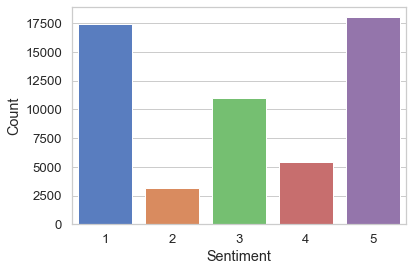

In [11]:
# The scale for the selected model is from 1(negative) to 5(positive)
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
sns.countplot(x=tweets_clean["sentiment"])
plt.xlabel("Sentiment")
plt.ylabel("Count")

##### The 50.000 Tweets are from the date 02/09/2022 only, which by the results, we can see the impressions are very distributed, about the term "vaccine".
##### The model used https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment  
